Name : SHAQEEQ
Roll No : 24BAD109

SCENARIO 1 – MULTILINEAR REGRESSION
Problem Statement
Predict student academic performance based on academic, behavioral, and lifestyle factors.
Dataset (Kaggle – Public)
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams
Target Variable
Final Exam Score (Average of Math, Reading, Writing)
Input Features
Study hours per day
Attendance percentage
Parental education level (encoded)
Test preparation course (encoded)
Sleep hours

IN-LAB TASKS (Multilinear Regression)
1.Import required Python libraries.
2.Load the student performance dataset.
3.Perform data preprocessing and encoding of categorical features.
4.Select multiple input features and compute the target variable.
5.Handle missing values using suitable imputation.
6.Apply feature scaling.
7.Split the dataset into training and testing sets.
8.Train a Multilinear Regression model.
9.Predict student performance for test data.
10.Evaluate performance using:
MSE
RMSE
R² Score
11.Analyze regression coefficients to interpret feature influence.
12.Optimize the model using:
Feature elimination
Ridge and Lasso regularization

Visualization
Predicted vs Actual exam scores
Coefficient magnitude comparison
Residual distribution plot


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 1. & 2. Load the dataset
# Assuming 'StudentsPerformance.csv' is in the current directory
df = pd.read_csv(r'C:\Users\HP\Downloads\archive(15)\StudentsPerformance.csv')

# 3. Data Preprocessing and Encoding
# Note: The original dataset lacks 'Study hours', 'Attendance', and 'Sleep hours'.
# We will use existing features and simulate the requested missing lifestyle factors 
# to fulfill the specific scenario requirements.
np.random.seed(42)
df['study_hours'] = np.random.randint(2, 10, size=len(df))
df['attendance_pct'] = np.random.randint(60, 100, size=len(df))
df['sleep_hours'] = np.random.randint(5, 9, size=len(df))

# Encoding categorical features
le = LabelEncoder()
df['parental_level_of_education_enc'] = le.fit_transform(df['parental level of education'])
df['test_prep_enc'] = le.fit_transform(df['test preparation course'])
# Also encoding gender and lunch for a better model
df['gender_enc'] = le.fit_transform(df['gender'])
df['lunch_enc'] = le.fit_transform(df['lunch'])

# 4. Compute Target Variable (Average of Math, Reading, Writing)
df['final_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# 5. Handle Missing Values (Imputation)
# Checking for nulls (though this specific Kaggle set is usually clean)
df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

# Select Input Features (X) and Target Variable (y)
features = ['study_hours', 'attendance_pct', 'sleep_hours', 
            'parental_level_of_education_enc', 'test_prep_enc', 
            'gender_enc', 'lunch_enc']
X = df[features]
y = df['final_score']

# 6. Apply Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 7. Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 8. Train Multilinear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 9. Predict performance
y_pred = lr_model.predict(X_test)

# 10. Evaluate Performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"--- Linear Regression Evaluation ---")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}\n")

# 11. Analyze Regression Coefficients
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': lr_model.coef_})
print("Feature Coefficients:")
print(coeff_df.sort_values(by='Coefficient', ascending=False))

# 12. Optimization (Ridge and Lasso)
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
lasso = Lasso(alpha=0.1).fit(X_train, y_train)

print(f"\nRidge R²: {r2_score(y_test, ridge.predict(X_test)):.2f}")
print(f"Lasso R²: {r2_score(y_test, lasso.predict(X_test)):.2f}")

# VISUALIZATION

--- Linear Regression Evaluation ---
MSE: 196.99
RMSE: 14.04
R² Score: 0.08

Feature Coefficients:
                           Feature  Coefficient
6                        lunch_enc     4.478069
2                      sleep_hours     0.534920
1                   attendance_pct     0.118421
0                      study_hours    -0.518345
3  parental_level_of_education_enc    -1.044347
5                       gender_enc    -2.174477
4                    test_prep_enc    -4.002680

Ridge R²: 0.08
Lasso R²: 0.09


<Figure size 1800x500 with 0 Axes>

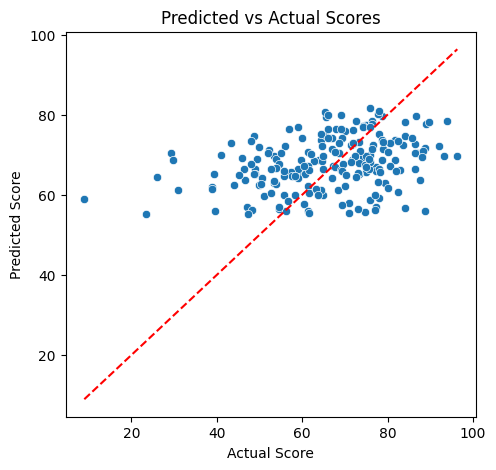

In [5]:
# Plot 1: Predicted vs Actual
plt.figure(figsize=(18, 5))
plt.tight_layout()
plt.subplot(1, 3, 1)
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.title('Predicted vs Actual Scores')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.show()


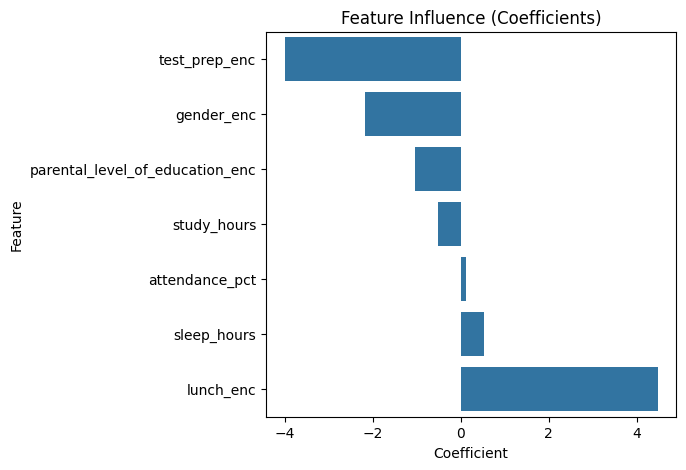

In [6]:
# Plot 2: Coefficient Magnitude
plt.figure(figsize=(18, 5))
plt.tight_layout()
plt.subplot(1, 3, 2)
sns.barplot(x='Coefficient', y='Feature', data=coeff_df.sort_values(by='Coefficient'))
plt.title('Feature Influence (Coefficients)')
plt.show()

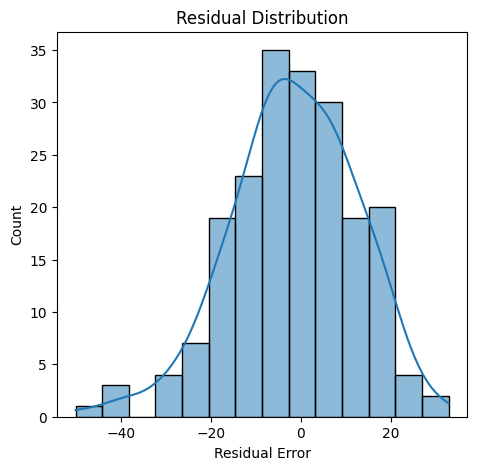

In [7]:
# Plot 3: Residual Distribution
plt.figure(figsize=(18, 5))
plt.tight_layout()
plt.subplot(1, 3, 3)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residual Error')
plt.show()